In [46]:
import yfinance as yf
import pandas as pd
tickers = ['TCS.NS', 'SPY','^NSEI', 'GC=F', '^TNX']
#yf_ticker = yf.Ticker(ticker)
hf_tick_hist=yf.download(tickers)

[*********************100%%**********************]  5 of 5 completed


In [44]:
yf.Ticker('GC=F').info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 1953.4,
 'open': 1955.3,
 'dayLow': 1953.5,
 'dayHigh': 1956.0,
 'regularMarketPreviousClose': 1953.4,
 'regularMarketOpen': 1955.3,
 'regularMarketDayLow': 1953.5,
 'regularMarketDayHigh': 1956.0,
 'volume': 10125,
 'regularMarketVolume': 10125,
 'averageVolume': 3763,
 'averageVolume10days': 121,
 'averageDailyVolume10Day': 121,
 'bid': 1953.3,
 'ask': 1953.4,
 'bidSize': 1400,
 'askSize': 800,
 'expireDate': 1703635200,
 'openInterest': 378066,
 'fiftyTwoWeekLow': 1615.1,
 'fiftyTwoWeekHigh': 2072.0,
 'fiftyDayAverage': 1931.33,
 'twoHundredDayAverage': 1918.3375,
 'currency': 'USD',
 'exchange': 'CMX',
 'quoteType': 'FUTURE',
 'symbol': 'GCZ23.CMX',
 'underlyingSymbol': 'GC=F',
 'shortName': 'Gold Dec 23',
 'firstTradeDateEpochUtc': 967608000,
 'timeZoneFullName': 'America/New_York',
 'timeZoneShortName': 'EDT',
 'uuid': '14f8f2ec-b820-38f7-ba5f-b3f5a47aec05',
 'gmtOffSetMilliseconds': -14400000,
 'trailingPegRatio': None}

In [55]:
df = ((hf_tick_hist['Close'] - hf_tick_hist['Close'].mean())/hf_tick_hist['Close'].std())[-3900:].fillna(method='ffill')

In [73]:
corr_dfs = df.rolling("100D").corr()

In [78]:
corr_dfs.loc[corr_dfs.index[200][0]]

,GC=F,SPY,TCS.NS,^NSEI,^TNX
GC=F,1.000000,0.024375,-0.131851,0.100409,0.195967
SPY,0.024375,1.000000,0.939957,0.954707,-0.236595
TCS.NS,-0.131851,0.939957,1.000000,0.961212,-0.312841
^NSEI,0.100409,0.954707,0.961212,1.000000,-0.218374
^TNX,0.195967,-0.236595,-0.312841,-0.218374,1.000000


In [86]:
gc_tnx = corr_dfs.xs('GC=F', level=1)['^TNX'].fillna(0)

<Axes: xlabel='Date'>

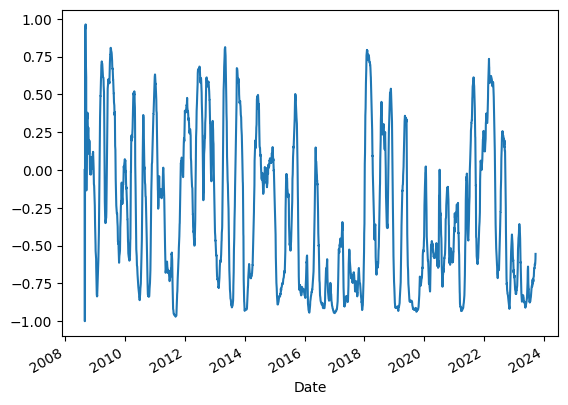

In [87]:
gc_tnx.plot()

In [83]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

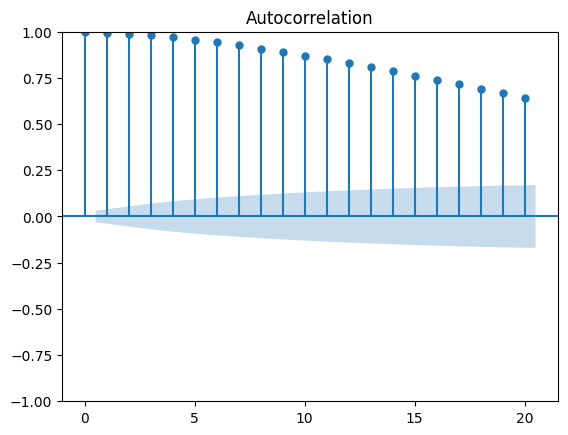

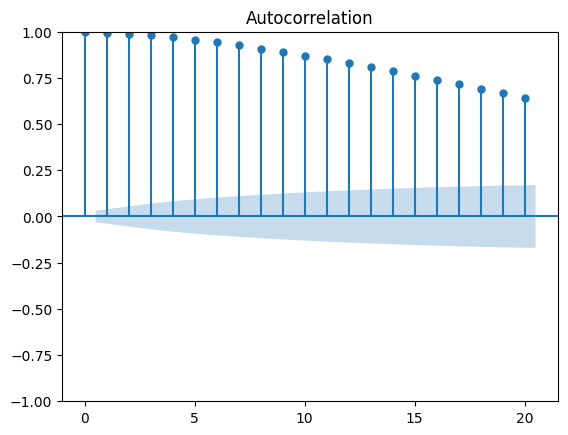

In [88]:
plot_acf(gc_tnx, lags =20)